Descriptive stats and visualizations for Stephen Curry in 2022

In [1]:
import pandas as pd

url = 'https://www.basketball-reference.com/players/c/curryst01/gamelog/2022/'

curry_data = pd.read_html(url)[0]
curry_data.to_csv('stephen_curry_game_log.csv', index=False)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Stephen Curry's game log data
curry_data = pd.read_csv('steph_data.csv')
curry_data.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2022-10-18,34-218,GSW,NaN,LAL,W (+14),1,32:48:00,...,5.0,6.0,7.0,4.0,1.0,4.0,1.0,33.0,29.0,20.0
1,2,2.0,2022-10-21,34-221,GSW,NaN,DEN,L (-5),1,35:55:00,...,4.0,5.0,4.0,0.0,0.0,3.0,2.0,34.0,23.5,9.0
2,3,3.0,2022-10-23,34-223,GSW,NaN,SAC,W (+5),1,31:21:00,...,5.0,5.0,2.0,1.0,0.0,2.0,3.0,33.0,22.7,19.0
3,4,4.0,2022-10-25,34-225,GSW,@,PHO,L (-29),1,29:55:00,...,7.0,7.0,8.0,1.0,0.0,1.0,1.0,21.0,18.4,-17.0
4,5,5.0,2022-10-27,34-227,GSW,NaN,MIA,W (+13),1,36:57:00,...,6.0,7.0,9.0,1.0,0.0,3.0,0.0,33.0,29.6,13.0


In [3]:
curry_data.shape

(82, 30)

In [4]:
curry_data.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [5]:
# Convert date column to datetime format
curry_data['Date'] = pd.to_datetime(curry_data['Date'])

In [6]:

# Calculate summary statistics
total_games = len(curry_data)
total_points = curry_data['PTS'].sum()
avg_points = curry_data['PTS'].mean()
max_points = curry_data['PTS'].max()
min_points = curry_data['PTS'].min()
fg_pct = curry_data['FG%'].mean()
three_pct = curry_data['3P%'].mean()

# Print summary statistics
print('Total games played:', total_games)
print('Total points scored:', total_points)
print('Average points per game:', round(avg_points, 2))
print('Most points scored in a game:', max_points)
print('Fewest points scored in a game:', min_points)
print('Field goal percentage:', round(fg_pct * 100, 2), '%')
print('Three-point percentage:', round(three_pct * 100, 2), '%')

# Calculate number of games with 30+ points, 40+ points, and 50+ points
thirty_plus = len(curry_data[curry_data['PTS'] >= 30])
forty_plus = len(curry_data[curry_data['PTS'] >= 40])
fifty_plus = len(curry_data[curry_data['PTS'] >= 50])

# Print number of games with 30+ points, 40+ points, and 50+ points
print('Number of games with 30+ points:', thirty_plus)
print('Number of games with 40+ points:', forty_plus)
print('Number of games with 50+ points:', fifty_plus)

# Calculate number of games with 10+ three-point attempts and three-point percentage over 40%
ten_plus_att = len(curry_data[curry_data['3PA'] >= 10])
forty_pct_plus = len(curry_data[curry_data['3P%'] >= 0.4])

# Print number of games with 10+ three-point attempts and three-point percentage over 40%
print('Number of games with 10+ three-point attempts:', ten_plus_att)
print('Number of games with three-point percentage over 40%:', forty_pct_plus)


Total games played: 82
Total points scored: 1648.0
Average points per game: 29.43
Most points scored in a game: 50.0
Fewest points scored in a game: 12.0
Field goal percentage: 49.29 %
Three-point percentage: 42.74 %
Number of games with 30+ points: 28
Number of games with 40+ points: 6
Number of games with 50+ points: 2
Number of games with 10+ three-point attempts: 41
Number of games with three-point percentage over 40%: 34


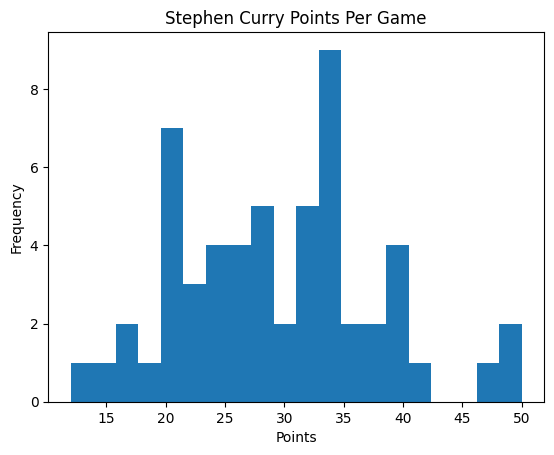

In [7]:
# Create a histogram of points per game
plt.hist(curry_data['PTS'], bins=20)
plt.title('Stephen Curry Points Per Game')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

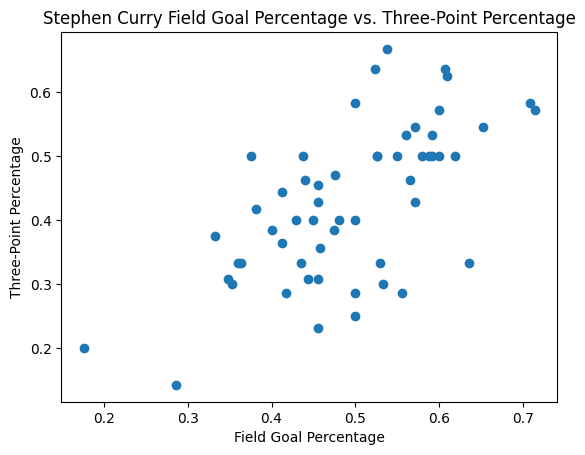

In [8]:
# Create a scatter plot of field goal percentage vs. three-point percentage
plt.scatter(curry_data['FG%'], curry_data['3P%'])
plt.title('Stephen Curry Field Goal Percentage vs. Three-Point Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Three-Point Percentage')
plt.show()

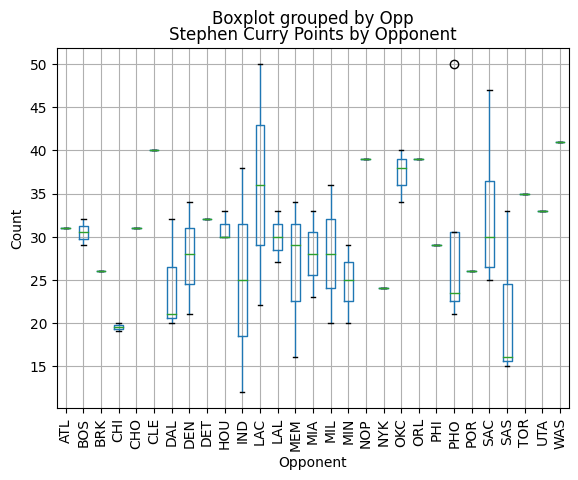

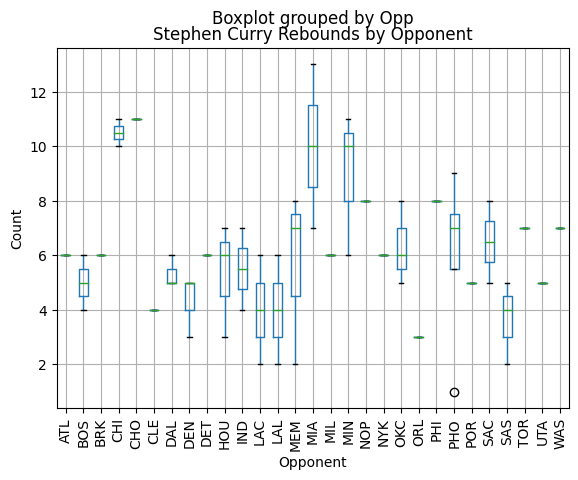

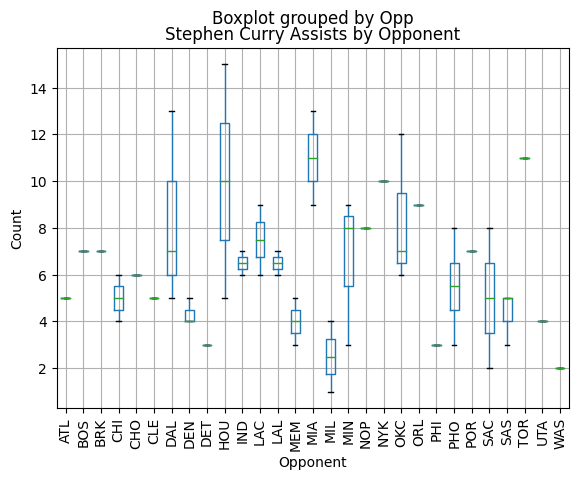

In [12]:
# Create a box plot of points, rebounds, and assists by opponent
curry_data.boxplot(column=['PTS'], by='Opp', rot=90)
plt.title('Stephen Curry Points by Opponent')
plt.xlabel('Opponent')
plt.ylabel('Count')
plt.show()

curry_data.boxplot(column=['TRB'], by='Opp', rot=90)
plt.title('Stephen Curry Rebounds by Opponent')
plt.xlabel('Opponent')
plt.ylabel('Count')
plt.show()

curry_data.boxplot(column=['AST'], by='Opp', rot=90)
plt.title('Stephen Curry Assists by Opponent')
plt.xlabel('Opponent')
plt.ylabel('Count')
plt.show()

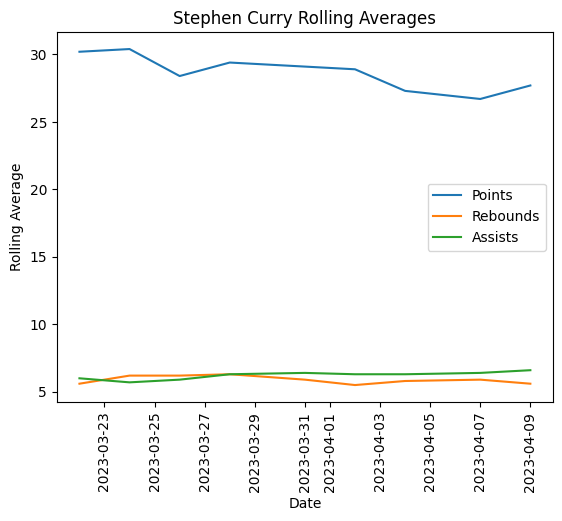

In [14]:
# Calculate rolling averages of points, rebounds, and assists
curry_data['Points_Rolling_Avg'] = curry_data['PTS'].rolling(window=10).mean()
curry_data['Rebounds_Rolling_Avg'] = curry_data['TRB'].rolling(window=10).mean()
curry_data['Assists_Rolling_Avg'] = curry_data['AST'].rolling(window=10).mean()

# Create a line plot of Curry's rolling averages
plt.plot(curry_data['Date'], curry_data['Points_Rolling_Avg'], label='Points')
plt.plot(curry_data['Date'], curry_data['Rebounds_Rolling_Avg'], label='Rebounds')
plt.plot(curry_data['Date'], curry_data['Assists_Rolling_Avg'], label='Assists')
plt.legend()
plt.title('Stephen Curry Rolling Averages')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Rolling Average')
plt.show()

In [15]:
import seaborn as sns

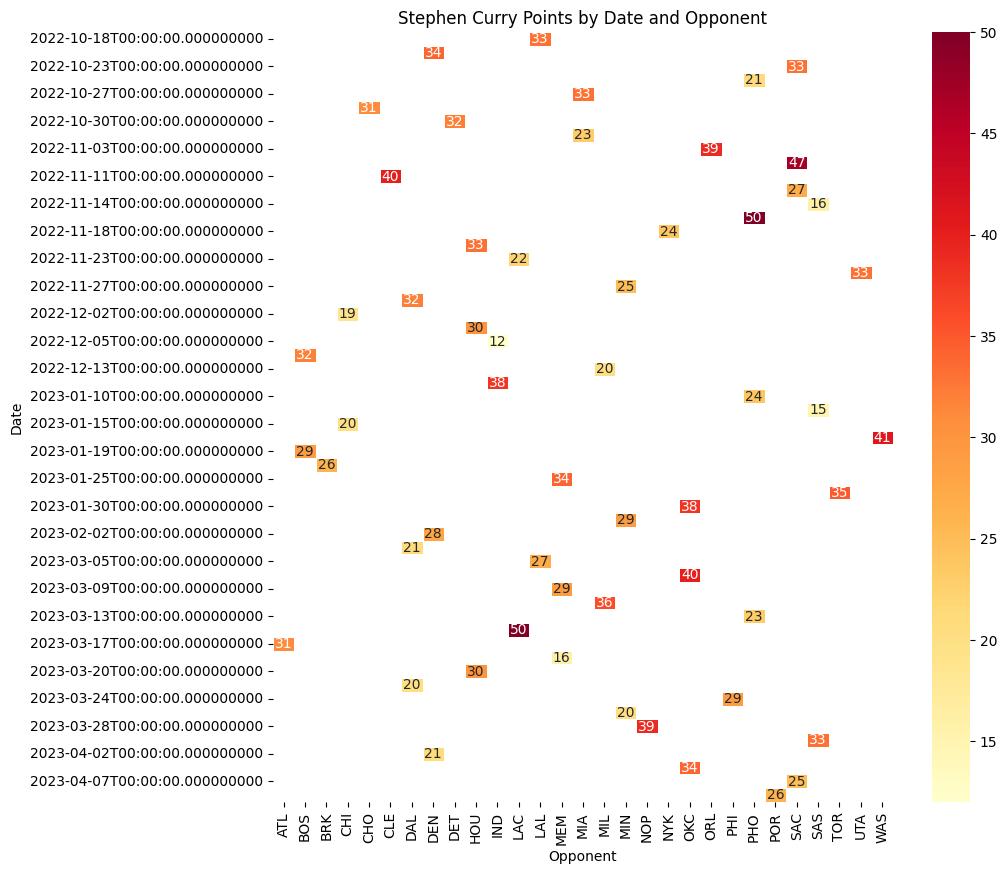

In [16]:
# Create pivot table of points by date and opponent
points_pivot = pd.pivot_table(curry_data, values='PTS', index='Date', columns='Opp')

# Create heatmap of points by date and opponent
plt.figure(figsize=(10, 10))
sns.heatmap(points_pivot, cmap='YlOrRd', annot=True, fmt='g', linewidths=.5)
plt.title('Stephen Curry Points by Date and Opponent')
plt.xlabel('Opponent')
plt.ylabel('Date')
plt.show()

Stats for overall points
 count    56.000000
mean     29.428571
std       8.426920
min      12.000000
25%      23.000000
50%      29.500000
75%      34.000000
max      50.000000
Name: PTS, dtype: float64


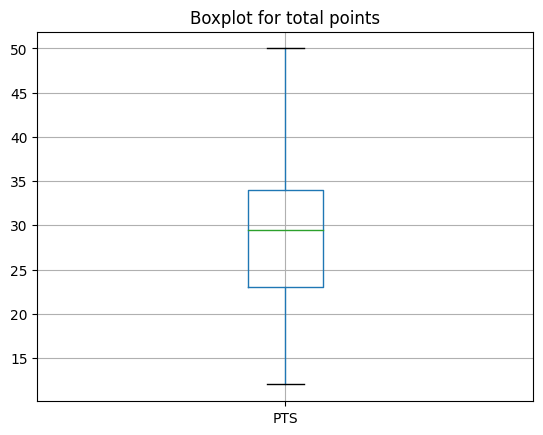

In [33]:
# Create box plots of points and three-pointers made
print("Stats for overall points\n", curry_data['PTS'].describe())
curry_data.boxplot(column=['PTS'])
plt.title('Boxplot for total points')
plt.show()


Stats for 3 pointers
 count    56.000000
mean      4.875000
std       1.888361
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max      10.000000
Name: 3P, dtype: float64


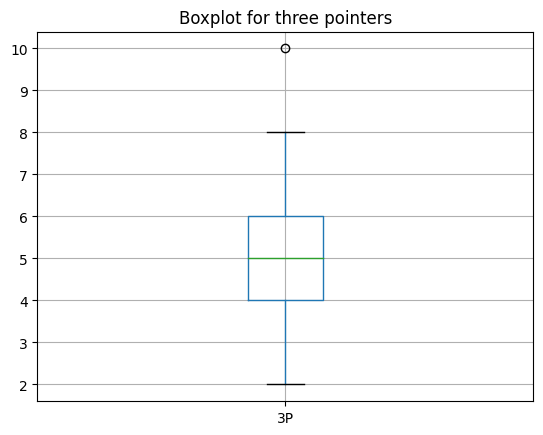

In [34]:
print("Stats for 3 pointers\n", curry_data['3P'].describe())
curry_data.boxplot(column=['3P'])
plt.title('Boxplot for three pointers')
plt.show()

The box plot of points shows that Stephen Curry has a high median score, indicating that he usually scores a lot of points per game. The box itself is fairly large, indicating that he has a wide range of scores in his games.
The box plot of three-pointers made shows that Stephen Curry has a high median number of three-pointers made, indicating that he is a prolific three-point shooter. The box itself is fairly small, indicating that he is fairly consistent in his number of three-pointers made per game. There are also a number of outliers, indicating that he has had some games with an unusually high number of three-pointers made.